In [1]:
%cd ..

/home/hoannc8/desktop/Evaluate-CLIP


In [2]:
pwd

'/home/hoannc8/desktop/Evaluate-CLIP'

In [10]:
import os
import sys
sys.path.insert(0, os.path.dirname("clip"))

import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
device = "cuda:3"
# import pdb; pdb.set_trace()
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

## Zero-shot prediction

In [9]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    # import pdb; pdb.set_trace()
    
    logits_per_image, logit_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

probs

array([[0.9927  , 0.004253, 0.003016]], dtype=float16)

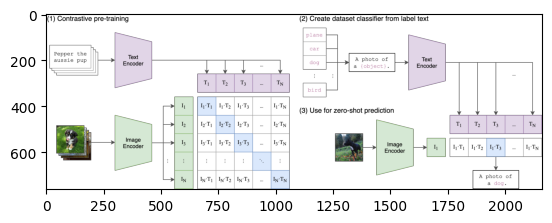

In [12]:
img = Image.open("CLIP.png")
plt.imshow(img)